# Project
### SDS322E



## Enter your name and EID here

Aryavir Chandra Munshi acm4733

**Please submit as a python notebook file on Canvas before the due date**

*For all questions, include the Python commands/functions that you used to find your answer. Answers without supporting code will not receive credit.*


### Libraries 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

### Question 1. 

   Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  Ocean_Name Reef_ID            Realm_Name  \
0   Atlantic     NaN     Tropical Atlantic   
1    Pacific     NaN  Eastern Indo-Pacific   
2   Atlantic     NaN     Tropical Atlantic   
3   Atlantic     NaN     Tropical Atlantic   
4   Atlantic     NaN     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  ...  \
0                     Cuba and Cayman Islands              Cuba  ...   
1            Society Islands French Polynesia  French Polynesia  ...   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdo


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


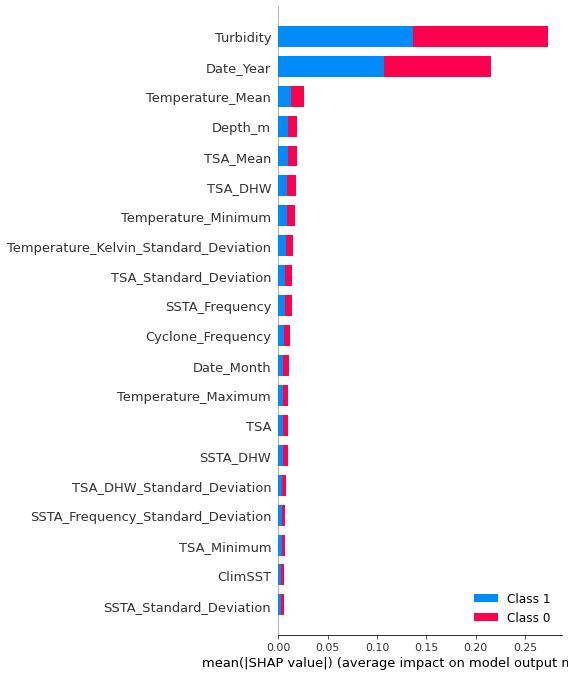

In [2]:
df = pd.read_csv('~/Data_Science/V2-global-bleaching-and-environmental-data.csv', na_values = 'nd') 

print(df.head())

print(list(df.columns))

#print(df['Bleaching_Comments'].unique())
#print(df['Exposure'])
#print(df['Substrate_Name'])
#print(df['Bleaching_Level'])

df['label'] = 1
df['label'][df['Percent_Bleaching'] < 50.0] = 0

# drop four columns from the end except label as they are character columns
df.drop(['Date', 'Site_Comments', 'Sample_Comments', 'Bleaching_Comments'], axis = 1, inplace = True)

# Drop columns from Site_ID to Site_Name (i.e. from the begin of the dataframe) as they are character columns
df.drop(df.loc[:, 'Site_ID':'Site_Name'], axis = 1, inplace = True)

# Drop Exposure,  Substrate_Name and Bleaching_Level since they are character columns
df.drop(['Exposure', 'Substrate_Name', 'Bleaching_Level'], axis = 1, inplace = True)

# Drop Percent_Bleaching as it is not needed since label is being computed from Percent_Bleaching
df.drop(['Percent_Bleaching'], axis = 1, inplace = True)

# Droping all rows with NaN values
df1 = df.dropna()

X = df1.iloc[:, :-1]
y = df1['label']

clf = RandomForestClassifier(n_estimators=500, random_state=41)
clf.fit(X,y)

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])


Analysis for  Object Id :  125
-------------------------
True Class (if 1, Percent_Bleaching >= 50.0, otherwise Percent_Bleaching < 50.0) :  1
Probability that this data point belong to class 0 = 0.00
Base Probability for class 0 = 0.77


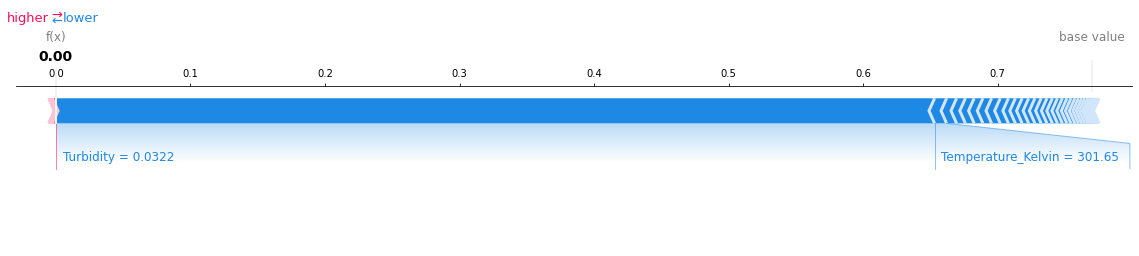

In [3]:
object_i = 125
class_object_i = int(y[::200].iloc[object_i])

print('Analysis for  Object Id : ', object_i)
print('-------------------------')

print('True Class (if 1, Percent_Bleaching >= 50.0, otherwise Percent_Bleaching < 50.0) : ', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0],
                shap_values[0][object_i,:],
                X.iloc[object_i,:],
                matplotlib=True)

Analysis for  Object Id :  55
-------------------------
True Class (if 1, Percent_Bleaching >= 50.0, otherwise Percent_Bleaching < 50.0) :  0
Probability that this data point belong to class 0 = 0.99
Base Probability for class 0 = 0.77


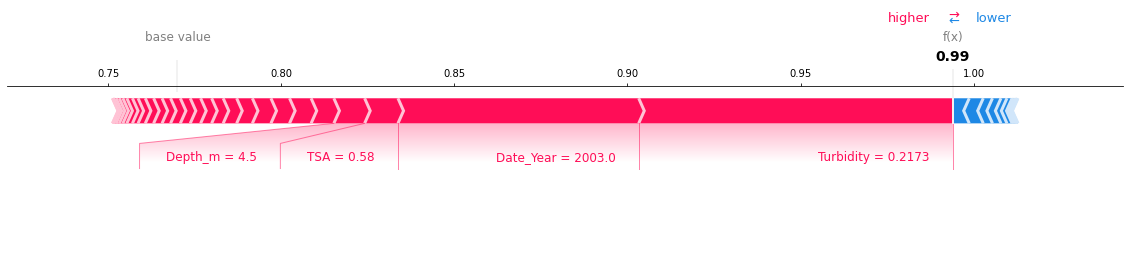

In [4]:
object_i = 55
class_object_i = int(y[::200].iloc[object_i])

print('Analysis for  Object Id : ', object_i)
print('-------------------------')

print('True Class (if 1, Percent_Bleaching >= 50.0, otherwise Percent_Bleaching < 50.0) : ', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0],
                shap_values[0][object_i,:],
                X.iloc[object_i,:],
                matplotlib=True)

### THE END